In [60]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Loading dataset

In [5]:
data=pd.read_csv('/content/drive/MyDrive/data_car.csv')

In [7]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
###EDA

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [10]:
data.shape

(11914, 16)

In [11]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [52]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11199.000000,11199.000000,11199.000000,11193.000000,11199.000000,11199.000000,11199.000000,1.119900e+04
mean,2010.714528,253.300205,5.666845,3.454123,26.610590,19.731851,1558.483347,4.192593e+04
std,7.228211,109.816822,1.794696,0.872946,8.977641,9.177555,1445.668872,6.153505e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.159950e+04
50%,2015.000000,239.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.303250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [12]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [ ]:
#PLOT

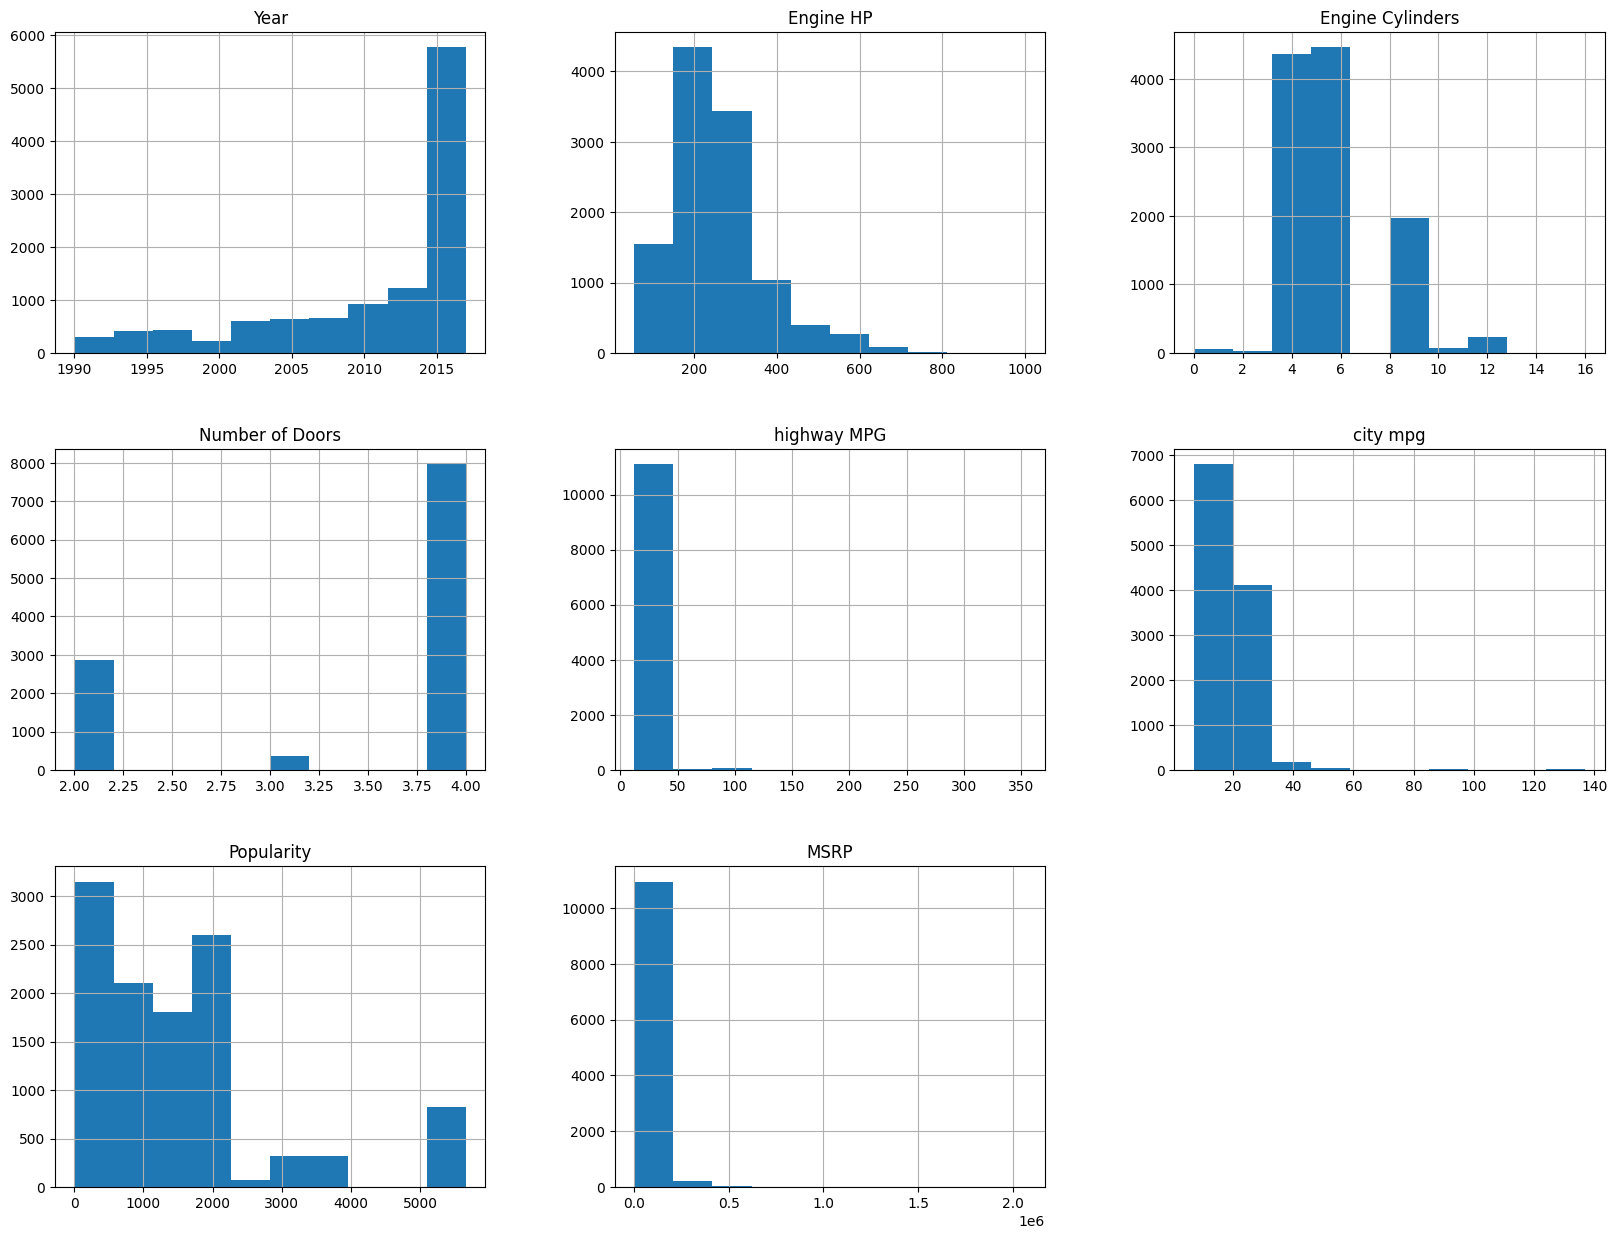

In [22]:
freqgraph=data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [ ]:
#no: cars vs Make

Text(0.5, 0, 'Make')

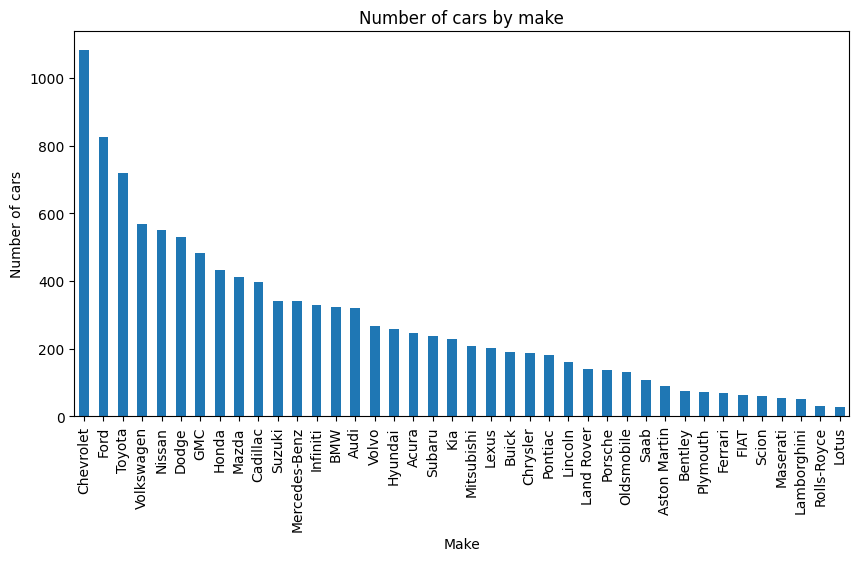

In [173]:
data.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')

In [ ]:
#distribution Of MSRP

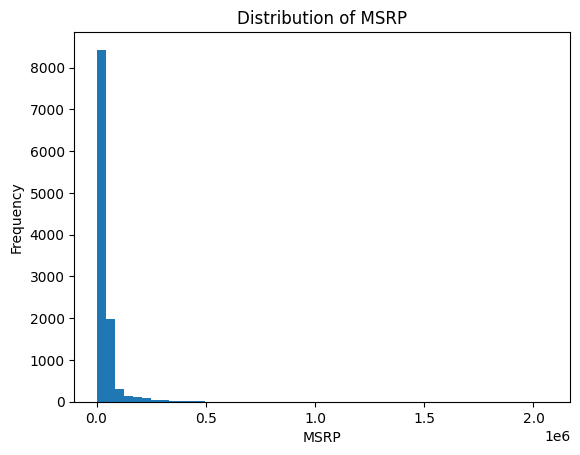

In [176]:
plt.hist(data['MSRP'], bins=50)

plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.title('Distribution of MSRP')

plt.show()

In [14]:
corr=data.corr()
corr

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
Number of Doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


In [ ]:
#coorelation heatmap

<Axes: >

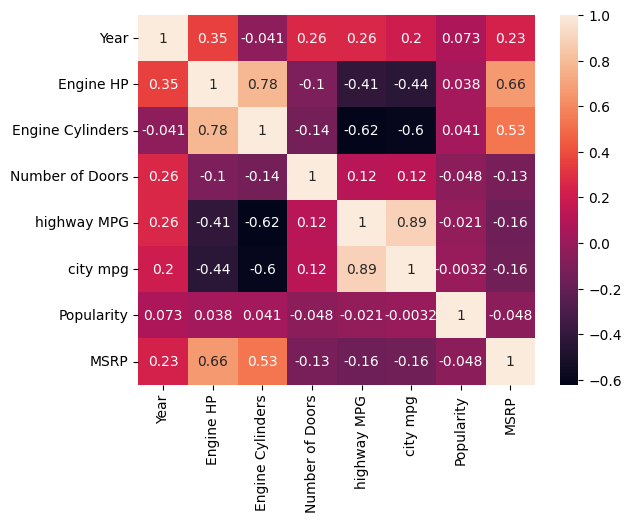

In [15]:
sns.heatmap(corr,annot=True)

In [ ]:
#Data Pre-processing

In [ ]:
#Duplicates

In [17]:
duplicates = data[data.duplicated()]
print("number of duplicate rows: ", duplicates.shape)

number of duplicate rows:  (715, 16)


In [18]:
duplicates

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,regular unleaded,95.0,4.0,MANUAL,four wheel drive,2.0,NaN,Compact,2dr SUV,26,22,481,2000
11603,Volvo,XC60,2017,regular unleaded,302.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,29,20,870,46350
11604,Volvo,XC60,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,30,23,870,40950
11708,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,481,29149


In [ ]:
#data cleaning

In [19]:
#dropping duplicates from the dataset
data.drop_duplicates(inplace=True)

In [20]:
data.shape

(11199, 16)

In [ ]:
#Handling Nulls

In [27]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [ ]:
#Numerical nulls

In [ ]:
#Engine HP & Engine Cylinders dont seem to be normally distributed. so imputing nulls with median values

In [23]:
median_hp = data['Engine HP'].median()

In [30]:
median_hp

239.0

In [24]:
data['Engine HP'] = data['Engine HP'].fillna(median_hp)

In [25]:
median_cyl = data['Engine Cylinders'].median()

In [31]:
median_cyl

6.0

In [26]:
data['Engine Cylinders'] = data['Engine Cylinders'].fillna(median_cyl)

In [ ]:
#Categorical nulls

In [ ]:
#Filling nulls in categorical columns Engine Fuel Type & Market Category with mode values

In [28]:
mode_ft = data['Engine Fuel Type'].mode()[0]
mode_ft

'regular unleaded'

In [29]:
data['Engine Fuel Type'].fillna(mode_ft, inplace=True)

In [32]:
mode_cat = data['Market Category'].mode()[0]
mode_cat

'Crossover'

In [33]:
data['Market Category'].fillna(mode_cat, inplace=True)

In [34]:
data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      6
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [ ]:
#all nulls imputed

In [35]:
for col in data.columns:
  num_zeros = (data[col] == 0).sum()
  print(f"Number of zeros in column '{col}': {num_zeros}")

Number of zeros in column 'Make': 0
Number of zeros in column 'Model': 0
Number of zeros in column 'Year': 0
Number of zeros in column 'Engine Fuel Type': 0
Number of zeros in column 'Engine HP': 0
Number of zeros in column 'Engine Cylinders': 56
Number of zeros in column 'Transmission Type': 0
Number of zeros in column 'Driven_Wheels': 0
Number of zeros in column 'Number of Doors': 0
Number of zeros in column 'Market Category': 0
Number of zeros in column 'Vehicle Size': 0
Number of zeros in column 'Vehicle Style': 0
Number of zeros in column 'highway MPG': 0
Number of zeros in column 'city mpg': 0
Number of zeros in column 'Popularity': 0
Number of zeros in column 'MSRP': 0


In [36]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [ ]:
#Detecting Outliers and removing them

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11199 non-null  object 
 4   Engine HP          11199 non-null  float64
 5   Engine Cylinders   11199 non-null  float64
 6   Transmission Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number of Doors    11193 non-null  float64
 9   Market Category    11199 non-null  object 
 10  Vehicle Size       11199 non-null  object 
 11  Vehicle Style      11199 non-null  object 
 12  highway MPG        11199 non-null  int64  
 13  city mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
 15  MSRP               11199 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
#Engine HP ,Engine Cylinders ,highway MPG,city mpg,Popularity 

In [53]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11199.000000,11199.000000,11199.000000,11193.000000,11199.000000,11199.000000,11199.000000,1.119900e+04
mean,2010.714528,253.300205,5.666845,3.454123,26.610590,19.731851,1558.483347,4.192593e+04
std,7.228211,109.816822,1.794696,0.872946,8.977641,9.177555,1445.668872,6.153505e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.159950e+04
50%,2015.000000,239.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.303250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
#Boxplots to visualize ouliers and fixing with iqr method

In [127]:
df=data.copy()

In [ ]:
#Popularity

<Axes: xlabel='Popularity'>

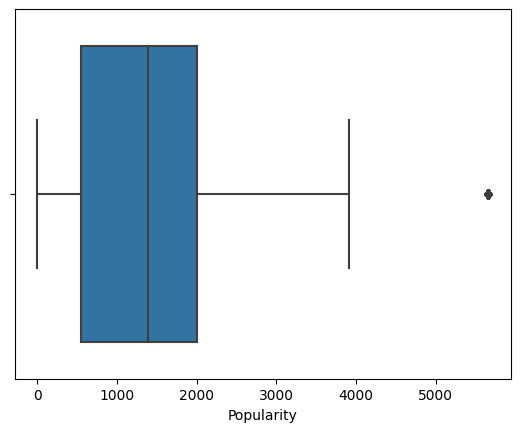

In [50]:
sns.boxplot(x=data['Popularity'])

In [ ]:
#city mpg

<Axes: xlabel='city mpg'>

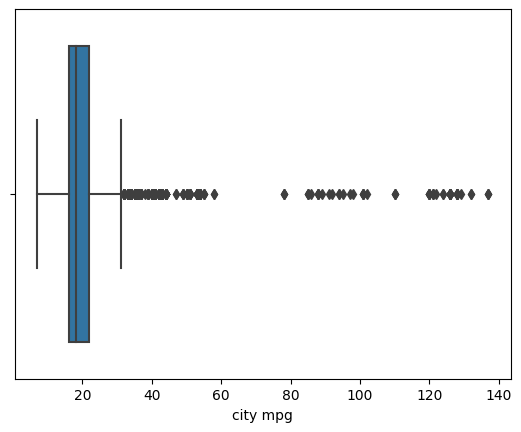

In [48]:
sns.boxplot(x=data['city mpg'])

<Axes: xlabel='highway MPG'>

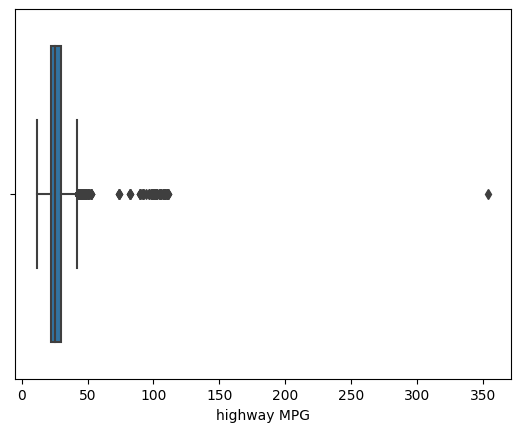

In [47]:
sns.boxplot(x=data['highway MPG'])

<Axes: xlabel='Engine Cylinders'>

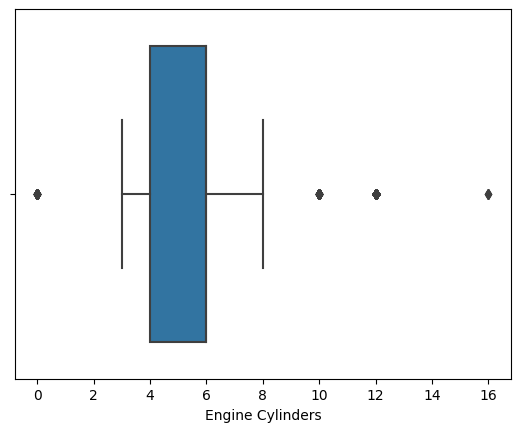

In [45]:
sns.boxplot(x=data['Engine Cylinders'])

<Axes: xlabel='Engine HP'>

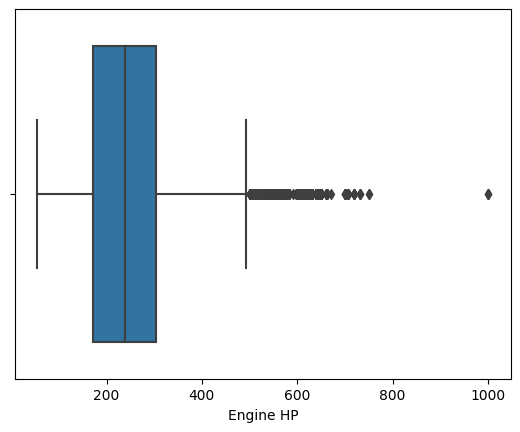

In [44]:
sns.boxplot(x=data['Engine HP'])

<Axes: xlabel='Year'>

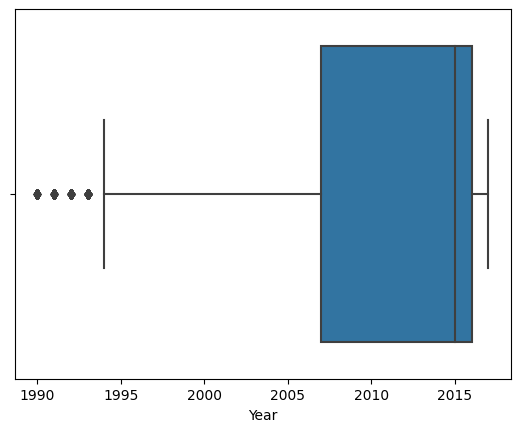

In [43]:
sns.boxplot(x=data['Year'])

In [ ]:
#fixing outliers

In [128]:
numerical_cols = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg','Popularity']

In [129]:
# Calculate the IQR for each column
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

In [130]:
#lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [131]:
outliers = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)

In [132]:
for col in numerical_cols:
    df.loc[df[col] > upper_bound[col], col] = np.median(df[col])
    df.loc[df[col] < lower_bound[col], col] = np.median(df[col])

In [133]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11199.000000,11199.000000,11199.000000,11193.000000,11199.000000,11199.000000,11199.000000,1.119900e+04
mean,2010.714528,238.319493,5.548799,3.454123,25.926422,18.690062,1243.776676,4.192593e+04
std,7.228211,84.112726,1.447636,0.872946,5.901188,4.482759,869.232353,6.153505e+04
min,1990.000000,55.000000,3.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.159950e+04
50%,2015.000000,239.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,2016.000000,291.000000,6.000000,4.000000,30.000000,21.000000,1851.000000,4.303250e+04
max,2017.000000,493.000000,8.000000,4.000000,42.000000,31.000000,3916.000000,2.065902e+06


In [ ]:
#scaling Engine HP and popularity as they have large variation

In [93]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
columns_to_scale = ['Engine HP','Popularity']

In [135]:
scaler = MinMaxScaler()

In [136]:
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [137]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),0.639269,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,1.000000,46135
1,BMW,1 Series,2011,premium unleaded (required),0.559361,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,1.000000,40650
2,BMW,1 Series,2011,premium unleaded (required),0.559361,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,1.000000,36350
3,BMW,1 Series,2011,premium unleaded (required),0.399543,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,1.000000,29450
4,BMW,1 Series,2011,premium unleaded (required),0.399543,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,1.000000,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),0.559361,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,0.051610,46120
11910,Acura,ZDX,2012,premium unleaded (required),0.559361,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,0.051610,56670
11911,Acura,ZDX,2012,premium unleaded (required),0.559361,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,0.051610,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),0.559361,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,0.051610,50920


###Model Building

In [98]:
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             289
Engine Cylinders        5
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            31
city mpg               25
Popularity             47
MSRP                 6049
dtype: int64

In [99]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),0.639269,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,1.0,46135
1,BMW,1 Series,2011,premium unleaded (required),0.559361,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,1.0,40650
2,BMW,1 Series,2011,premium unleaded (required),0.559361,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,1.0,36350
3,BMW,1 Series,2011,premium unleaded (required),0.399543,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,1.0,29450
4,BMW,1 Series,2011,premium unleaded (required),0.399543,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,1.0,34500


In [138]:
df.shape

(11199, 16)

In [ ]:
#removing Model as there are high unique values and is not beneficial for model and Market category.

In [139]:
df = df.drop(['Model', 'Market Category'], axis=1)

In [106]:
df.head(2)

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,2011,premium unleaded (required),0.639269,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,1.0,46135
1,BMW,2011,premium unleaded (required),0.559361,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,1.0,40650


In [140]:
#LabelEncoding categorical columns
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Make']=le.fit_transform(df['Make'])
df['Engine Fuel Type']=le.fit_transform(df['Engine Fuel Type'])
df['Transmission Type']=le.fit_transform(df['Transmission Type'])
df['Driven_Wheels']=le.fit_transform(df['Driven_Wheels'])
df['Vehicle Size']=le.fit_transform(df['Vehicle Size'])
df['Vehicle Style']=le.fit_transform(df['Vehicle Style'])

In [141]:
df.head(2)

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,2011,8,0.639269,6.0,3,3,2.0,0,8,26,19,1.0,46135
1,4,2011,8,0.559361,6.0,3,3,2.0,0,6,28,19,1.0,40650


In [ ]:
#splitting data to target and predictors

In [155]:
d=df.copy()

In [156]:
X=d.drop('MSRP',axis=1)
y=d['MSRP']

In [111]:
#packages for modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [144]:
models={
    'Linear Regression':LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'XG Boost Regression':XGBRegressor(),
    'XG Boost RF Regressor':XGBRFRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'CatBoost Regressor':CatBoostRegressor(verbose=0),
    'Random Forest':RandomForestRegressor(),
    'Light Gradient Boost':LGBMRegressor()
}

In [159]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print(name + ' trained')

Linear Regression trained
Ridge Regression trained
Lasso Regression trained
XG Boost Regression trained
XG Boost RF Regressor trained
DecisionTreeRegressor trained
CatBoost Regressor trained
Random Forest trained
Light Gradient Boost trained


In [ ]:
#Metrics

In [ ]:
#R2

In [160]:
def get_r2(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    return r2

In [163]:
for name,model in models.items():
    y_pred = model.predict(X_test)
    r2 = get_r2(y_test,y_pred)
    print(name + ' R2: {:.2f}'.format(r2))

Linear Regression R2: 0.20
Ridge Regression R2: 0.20
Lasso Regression R2: 0.20
XG Boost Regression R2: 0.95
XG Boost RF Regressor R2: 0.89
DecisionTreeRegressor R2: 0.94
CatBoost Regressor R2: 0.94
Random Forest R2: 0.95
Light Gradient Boost R2: 0.88


In [164]:
def get_mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse

In [165]:
for name,model in models.items():
    y_pred = model.predict(X_test)
    mse = get_mse(y_test,y_pred)
    print(name + ' MSE: {:.2f}'.format(mse))

Linear Regression MSE: 3081039691.82
Ridge Regression MSE: 3081040334.13
Lasso Regression MSE: 3081058562.84
XG Boost Regression MSE: 210584118.18
XG Boost RF Regressor MSE: 434729402.68
DecisionTreeRegressor MSE: 247220810.97
CatBoost Regressor MSE: 225343025.77
Random Forest MSE: 176383719.55
Light Gradient Boost MSE: 462750009.11


In [166]:
rf=RandomForestRegressor()

In [168]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [169]:
y_pred = rf.predict(X_test)

In [170]:
y_pred

array([49338.97      , 41674.29761905, 34175.5747619 , ...,
       18016.1825    ,  3757.505     , 29141.27      ])

In [172]:
print(y_pred.max())
print(y_pred.min())

1697220.26
2000.0


After modelling using dataset to predict Manufacturer Suggested Retail Price (MSRP), XG Boost regression and Random Forest regression models gave best R2 score. Also considering MSE, it can be seen that Random Forest gives the lowest score among the 2. So the Best prediction model here is Random Forest
